<a href="https://colab.research.google.com/github/babupallam/PyTorch-Learning-Repository/blob/main/04_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section, we will focus on training neural networks in PyTorch, covering topics like training loops, loss calculation, backpropagation, optimization, and monitoring model performance. Understanding how to structure a proper training loop and optimize your model’s weights is critical to developing an efficient and accurate neural network.



#### **4.1. Overview of the Training Process**
- **Training a neural network** involves iteratively updating model parameters (weights and biases) using an optimization algorithm like Stochastic Gradient Descent (SGD) to minimize the loss function.
- The steps to train a neural network are:
  1. **Forward Pass**: Input data is passed through the network to compute predictions.
  2. **Loss Calculation**: The loss function computes how far the predicted values are from the actual values.
  3. **Backward Pass (Backpropagation)**: Gradients are computed for the model parameters using automatic differentiation.
  4. **Optimization**: The optimizer updates the parameters based on the gradients to reduce the loss.

---



#### **4.2. Key Components for Training**
- **Model**: Defines the neural network structure using `torch.nn.Module`.
- **Loss Function**: Measures the error between the predicted and true values. Common loss functions include:
  - `nn.MSELoss()` for regression.
  - `nn.CrossEntropyLoss()` for classification.
- **Optimizer**: Updates the model's parameters based on the computed gradients.
  - Common optimizers: `optim.SGD()`, `optim.Adam()`.
- **Training Loop**: Iterates over the dataset for a specified number of epochs, performing forward and backward passes, and updating the model’s weights.

---



#### **4.3. Full Training Loop Implementation**

Let’s walk through the steps of training a neural network in PyTorch, from model initialization to optimizing over multiple epochs.

---

**4.3.1. Example Neural Network Training on MNIST**

In this example, we will build and train a simple feedforward neural network to classify images from the MNIST dataset. The network consists of fully connected layers with ReLU activations and is trained using the Cross-Entropy Loss for multi-class classification.

**Demonstration: Full Training Loop on MNIST**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define a simple neural network with two hidden layers
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input layer: 28x28=784, Hidden layers: 128 and 64 neurons, Output layer: 10 classes (digits 0-9)
        self.fc1 = nn.Linear(28*28, 128)  # Fully connected layer 1
        self.fc2 = nn.Linear(128, 64)     # Fully connected layer 2
        self.fc3 = nn.Linear(64, 10)      # Output layer

    def forward(self, x):
        # Flatten the input image (28x28 pixels) into a vector of 784 elements
        x = x.view(-1, 28*28)  # Flatten the input (28x28 images -> 784 inputs)

        # Pass through the first fully connected layer and apply ReLU activation
        x = torch.relu(self.fc1(x))  # Apply ReLU to first hidden layer

        # Pass through the second fully connected layer and apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU to second hidden layer

        # Pass through the output layer (no activation function here because
        # CrossEntropyLoss will apply softmax internally)
        x = self.fc3(x)  # No activation at output layer
        return x

# Define transformations: Convert images to tensors and normalize to [-1, 1] range
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images: mean 0.5, std 0.5 (scale to [-1, 1])
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Load the dataset into DataLoader for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleNN()  # Initialize the neural network
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Training loop
epochs = 5  # Number of epochs to train for

for epoch in range(epochs):  # Iterate over each epoch
    running_loss = 0.0  # Track running loss
    for i, (inputs, labels) in enumerate(train_loader):  # Iterate over each batch in the training loader

        optimizer.zero_grad()  # Clear the gradients from the previous step

        outputs = model(inputs)  # Forward pass: Compute model output for the input data

        loss = criterion(outputs, labels)  # Compute the loss based on the model's predictions and actual labels

        loss.backward()  # Backward pass: Compute gradients for the model parameters

        optimizer.step()  # Update the model's parameters using the computed gradients

        running_loss += loss.item()  # Accumulate the loss value for monitoring

        # Print the average loss every 100 batches
        if (i + 1) % 100 == 0:  # Print the running loss every 100 mini-batches
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0  # Reset the running loss after each print

print("Training Complete.")  # Training process is finished


Epoch [1/5], Step [100/938], Loss: 1.0164
Epoch [1/5], Step [200/938], Loss: 0.4219
Epoch [1/5], Step [300/938], Loss: 0.3758
Epoch [1/5], Step [400/938], Loss: 0.3530
Epoch [1/5], Step [500/938], Loss: 0.3338
Epoch [1/5], Step [600/938], Loss: 0.2895
Epoch [1/5], Step [700/938], Loss: 0.2672
Epoch [1/5], Step [800/938], Loss: 0.2554
Epoch [1/5], Step [900/938], Loss: 0.2477
Epoch [2/5], Step [100/938], Loss: 0.2198
Epoch [2/5], Step [200/938], Loss: 0.2352
Epoch [2/5], Step [300/938], Loss: 0.2019
Epoch [2/5], Step [400/938], Loss: 0.1816
Epoch [2/5], Step [500/938], Loss: 0.2044
Epoch [2/5], Step [600/938], Loss: 0.1684
Epoch [2/5], Step [700/938], Loss: 0.1843
Epoch [2/5], Step [800/938], Loss: 0.1727
Epoch [2/5], Step [900/938], Loss: 0.1658
Epoch [3/5], Step [100/938], Loss: 0.1577
Epoch [3/5], Step [200/938], Loss: 0.1516
Epoch [3/5], Step [300/938], Loss: 0.1391
Epoch [3/5], Step [400/938], Loss: 0.1354
Epoch [3/5], Step [500/938], Loss: 0.1337
Epoch [3/5], Step [600/938], Loss:


##### Explanation of the code:

1. **Neural Network Definition**:
   - A simple feedforward neural network with two hidden layers (`128` and `64` neurons) and an output layer with `10` neurons (corresponding to the `10` digit classes in MNIST).
   - **ReLU** is used as the activation function for the hidden layers, and **CrossEntropyLoss** handles the final output, including applying softmax internally.

2. **Data Loading**:
   - **MNIST Dataset** is loaded using the `torchvision.datasets.MNIST` class, and images are transformed into tensors and normalized with mean and standard deviation of `0.5`.
   - The dataset is split into **training** and **test** sets, and both are loaded using PyTorch’s `DataLoader` to process data in mini-batches.

3. **Training Loop**:
   - For each **epoch**, the model iterates over mini-batches of size `64` from the training dataset.
   - For each mini-batch, the process is:
     - **Zero gradients** (resetting gradients from the previous step),
     - **Forward pass** to compute predictions,
     - **Loss computation** using the `CrossEntropyLoss` function,
     - **Backward pass** to calculate gradients,
     - **Optimizer step** to update model parameters.
   - The loss is printed every `100` mini-batches, and the running loss is reset after each print.

4. **Completion**:
   - After completing the specified number of epochs, the training process is finished, and the message `"Training Complete."` is printed.



#### **4.4. Model Evaluation**
- After training the model, it’s essential to evaluate its performance on a separate test dataset.
- During evaluation, we use the model to make predictions on unseen data and compare the predictions to the actual labels.

---



**4.4.1. Evaluating the Model’s Accuracy**

After training, we evaluate the model on the test set by calculating its accuracy.

**Demonstration: Model Evaluation on Test Set**

In [3]:
# Function to calculate accuracy of the model on the test set
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode to turn off dropout, batch normalization, etc.
    correct = 0   # Initialize a counter for correct predictions
    total = 0     # Initialize a counter for total samples

    # Disable gradient calculation during evaluation, as it reduces memory usage and speeds up computations
    with torch.no_grad():
        for inputs, labels in test_loader:  # Iterate through each batch in the test loader
            # Forward pass: Get model's predictions for the inputs
            outputs = model(inputs)

            # Use torch.max to get the class with the highest score (prediction)
            _, predicted = torch.max(outputs.data, 1)  # 'predicted' contains the predicted class labels

            # Update the total number of samples processed
            total += labels.size(0)  # labels.size(0) gives the batch size (number of samples in this batch)

            # Count how many predictions were correct by comparing 'predicted' with the actual labels
            correct += (predicted == labels).sum().item()  # .sum().item() gives the number of correct predictions in the batch

    # Calculate accuracy as the percentage of correctly classified samples
    accuracy = 100 * correct / total  # Accuracy = (correct predictions / total samples) * 100

    # Print the accuracy result for the test set
    print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

# Evaluate the model using the test set DataLoader
evaluate_model(model, test_loader)


Accuracy of the model on the test set: 96.22%


**Explanation:**

- model.eval(): Puts the model in evaluation mode. This disables certain layers like dropout and batch normalization that behave differently during training, ensuring consistent behavior during testing.

- torch.no_grad(): Turns off gradient tracking, which saves memory and speeds up the computations since gradients are not needed during evaluation.

- torch.max(outputs.data, 1): Gets the predicted class with the highest score (logits) from the model's output. The 1 indicates that the function should find the maximum value along the dimension representing the class scores.

- correct += (predicted == labels).sum().item(): Compares the model's predicted labels (predicted) to the actual labels (labels). It counts the number of correct predictions and adds them to the correct variable.

- Accuracy Calculation: The accuracy is computed as (correct / total) * 100, representing the percentage of correctly classified samples out of the total number of samples in the test set.


#### **4.5. Monitoring Training with Metrics**
- Monitoring training progress with metrics such as **loss**, **accuracy**, or **precision** and **recall** is important to ensure that the model is learning correctly.
- **Training Loss**: If the training loss decreases over time, it generally indicates that the model is learning.
- **Validation Loss and Accuracy**: Monitoring these metrics on a validation dataset helps detect **overfitting** (where the model performs well on training data but poorly on unseen data).

---

**4.5.1. Plotting Loss and Accuracy During Training**

Tracking and visualizing the loss and accuracy during training can help understand how well the model is converging.

**Demonstration: Plotting Training and Validation Loss**

Epoch [1/5], Training Loss: 0.0877, Validation Loss: 0.1037
Epoch [2/5], Training Loss: 0.0784, Validation Loss: 0.1089
Epoch [3/5], Training Loss: 0.0696, Validation Loss: 0.0961
Epoch [4/5], Training Loss: 0.0642, Validation Loss: 0.0854
Epoch [5/5], Training Loss: 0.0588, Validation Loss: 0.0892


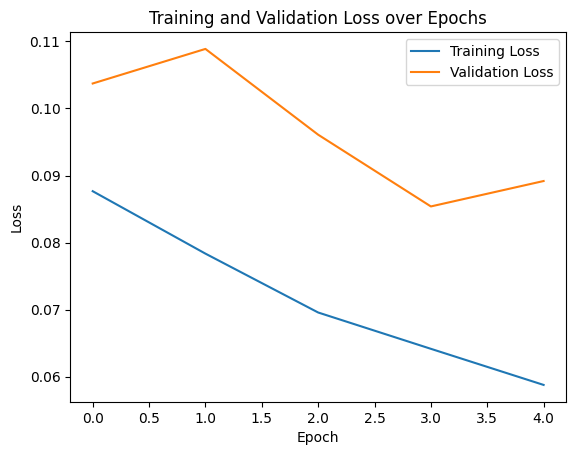

In [4]:
import matplotlib.pyplot as plt

# Variables to store loss values for plotting after training
train_loss_history = []  # List to store the average training loss for each epoch
val_loss_history = []    # List to store the average validation loss for each epoch

for epoch in range(epochs):  # Loop through the specified number of epochs
    # Track the running training loss for the current epoch
    running_loss = 0.0

    model.train()  # Set the model to training mode (enables dropout, batch normalization, etc.)

    for inputs, labels in train_loader:  # Iterate over each mini-batch of data in the training DataLoader
        optimizer.zero_grad()  # Clear the gradients from the previous step

        outputs = model(inputs)  # Forward pass: Get model predictions for the input batch
        loss = criterion(outputs, labels)  # Calculate the loss between predictions and actual labels

        loss.backward()  # Backward pass: Compute gradients of the loss with respect to model parameters

        optimizer.step()  # Update the model parameters based on the computed gradients

        running_loss += loss.item()  # Accumulate the loss for this mini-batch to calculate the average later

    # Calculate and store the average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)  # Average loss across all mini-batches in the epoch
    train_loss_history.append(avg_train_loss)  # Append the average training loss to the history list

    # Calculate validation loss after each epoch
    model.eval()  # Set the model to evaluation mode (disables dropout, batch normalization, etc.)
    val_loss = 0.0  # Initialize the validation loss for this epoch
    with torch.no_grad():  # Disable gradient calculation for the validation loop
        for inputs, labels in test_loader:  # Iterate over each mini-batch in the validation DataLoader
            outputs = model(inputs)  # Get the model's predictions
            loss = criterion(outputs, labels)  # Calculate the loss for the validation data
            val_loss += loss.item()  # Accumulate validation loss for each mini-batch

    avg_val_loss = val_loss / len(test_loader)  # Calculate the average validation loss for the epoch
    val_loss_history.append(avg_val_loss)  # Append the average validation loss to the history list

    # Print the average training and validation loss for the current epoch
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# Plot training and validation loss over epochs
plt.plot(train_loss_history, label='Training Loss')  # Plot training loss history
plt.plot(val_loss_history, label='Validation Loss')  # Plot validation loss history
plt.xlabel('Epoch')  # Label for x-axis (number of epochs)
plt.ylabel('Loss')   # Label for y-axis (loss value)
plt.title('Training and Validation Loss over Epochs')  # Plot title
plt.legend()  # Display legend to distinguish training and validation loss
plt.show()  # Display the plot


**Explanation of the output:**
  - **Training Loss**: The training loss consistently decreases over the epochs, indicating that the model is learning and improving its ability to fit the training data. This suggests that the optimization process is working well and the model is converging.

  - **Validation Loss**: The validation loss initially decreases but begins to increase slightly towards the end. This could be an early sign of **overfitting**, where the model performs well on the training data but starts to struggle to generalize to unseen data (validation set).

  - Insights:
    - The model is likely starting to overfit after the second or third epoch, as the gap between training loss and validation loss widens slightly, with validation loss even increasing.
    - **Potential actions**:
      - **Reduce overfitting**: Techniques like regularization (e.g., weight decay), dropout, or early stopping can help mitigate overfitting.
      - **Adjust learning rate**: If the model is converging too fast, lowering the learning rate could help find a better minimum and improve generalization.



**Explanation of the code:**

1. **`train_loss_history` and `val_loss_history`**: These lists are used to store the average training and validation loss values at each epoch, which will be plotted at the end.
  
2. **Training Loop**:
   - For each **epoch**, the model iterates over the mini-batches in the `train_loader`. After every mini-batch:
     - The **forward pass** is performed to calculate predictions.
     - The **loss** is computed between the predictions and the true labels.
     - The **backward pass** computes the gradients of the loss, which are used to update the model’s parameters via the optimizer.

3. **Validation Loss**:
   - After training for an epoch, the model is switched to **evaluation mode** (`model.eval()`), which disables certain layers like dropout and batch normalization.
   - **Gradient calculation is disabled** during evaluation with `torch.no_grad()` to save memory and computation.
   - The validation loss is computed for the entire validation dataset, and the average is stored in `val_loss_history`.

4. **Plotting**:
   - After training, the losses for each epoch are plotted to visualize the **training and validation loss curves**. This helps monitor the model’s performance over time and detect issues like overfitting.

By tracking both training and validation loss, you can observe how well the model is learning and generalizing.


#### **4.6. State-of-the-Art Observations on Training Neural Networks**
- **Gradient-Based Optimizers**: Adam, RMSprop, and their variants have become the optimizers of choice in many state-of-the-art deep learning architectures due to their faster convergence and adaptive learning rates. Recent research, such as the **Rectified Adam (RAdam)**, has shown improvements in training stability.
  
- **Training Stability**: Researchers have observed that training deep neural networks can suffer from **exploding/vanishing gradients**, especially in very deep networks. Techniques like **gradient clipping**, **batch normalization**, and **skip connections** (used in ResNet) help mitigate these problems.

- **Learning Rate Scheduling**: Dynamic learning rates using techniques like **learning rate annealing** or **cosine annealing** have improved model convergence in many tasks. Learning rate schedulers adjust the learning rate during training based on the performance, leading to better results.

---



### Continuity to the Next Section
- In the next section, we will explore **Convolutional Neural Networks (CNNs)**, which are particularly effective for image processing tasks.
- We will build CNNs for tasks like image classification and see how they improve performance compared to fully connected networks.

This section covered training neural networks in PyTorch, including setting up the training loop, calculating loss, backpropagation, and evaluating model performance. With these basics in place, we are now ready to explore more advanced architectures like Convolutional Neural Networks in the next section.

### Observations

##### **Does backpropagation exist in a simple feedforward neural network?**

Yes, backpropagation exists in a simple feedforward neural network (FFNN). It is the primary method used to train feedforward neural networks by adjusting weights and biases to minimize the loss function.

#### Steps in a Feedforward Neural Network:
1. **Forward Pass**:
   - Input data is passed through the network layer by layer to compute the output (prediction).
   
2. **Loss Calculation**:
   - The difference between the network’s predicted output and the true output is calculated using a loss function (e.g., **CrossEntropyLoss**).

3. **Backward Pass (Backpropagation)**:
   - Backpropagation computes the gradients of the loss function with respect to each weight and bias by applying the chain rule. This process starts from the output layer and propagates back to the input layer.

4. **Weight Update**:
   - The optimizer uses the computed gradients to adjust the model's weights and biases to minimize the loss.

Backpropagation is integral to training a simple feedforward neural network, as it enables the model to learn by updating its weights during training.



---

##### **Is backpropagation mandatory in an MLP (Multilayer Perceptron)?**

Yes, **backpropagation is mandatory** in an MLP (Multilayer Perceptron) for efficient training and learning.

---


##### Why is backpropagation necessary in an MLP?

1. **Learning Weights**:
   - The main objective of training an MLP is to learn optimal weights and biases that minimize the error between predictions and true labels. Backpropagation provides the gradients needed to adjust these weights.

2. **Gradient Descent Optimization**:
   - Backpropagation computes the gradients of the loss function with respect to the model’s weights, enabling **gradient descent** or its variants (e.g., **Adam**) to update the parameters.

3. **Chain Rule for Gradient Calculation**:
   - In an MLP, multiple layers exist between input and output. Backpropagation uses the chain rule to calculate how the error from the output layer influences earlier layers.


---


##### Can an MLP Learn Without Backpropagation?

- No, without backpropagation, an MLP would not know how to adjust its weights based on the loss, making it impossible to learn.

- Alternative methods (e.g., genetic algorithms) exist but are computationally inefficient for training MLPs compared to backpropagation.



---